#Importing Libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report

#Load Dataset

In [2]:
!pip install kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d shantanudhakadd/bank-customer-churn-prediction

  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 82.7MB/s]


In [7]:
!unzip /content/bank-customer-churn-prediction.zip

Archive:  /content/bank-customer-churn-prediction.zip
  inflating: Churn_Modelling.csv     


In [8]:
dataset=pd.read_csv('/content/Churn_Modelling.csv')

In [9]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#Analyzing Data

In [10]:
dataset.shape

(10000, 14)

In [12]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#Visualizing Data

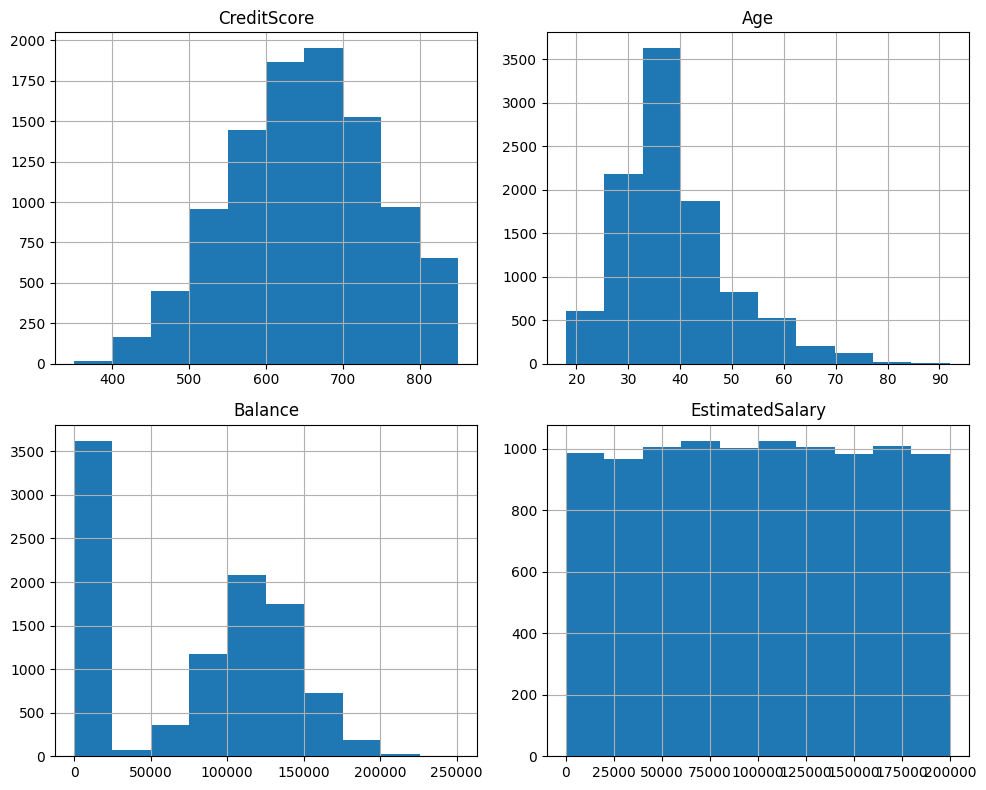

In [15]:
# Plot histograms for numerical features
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
dataset[numerical_features].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

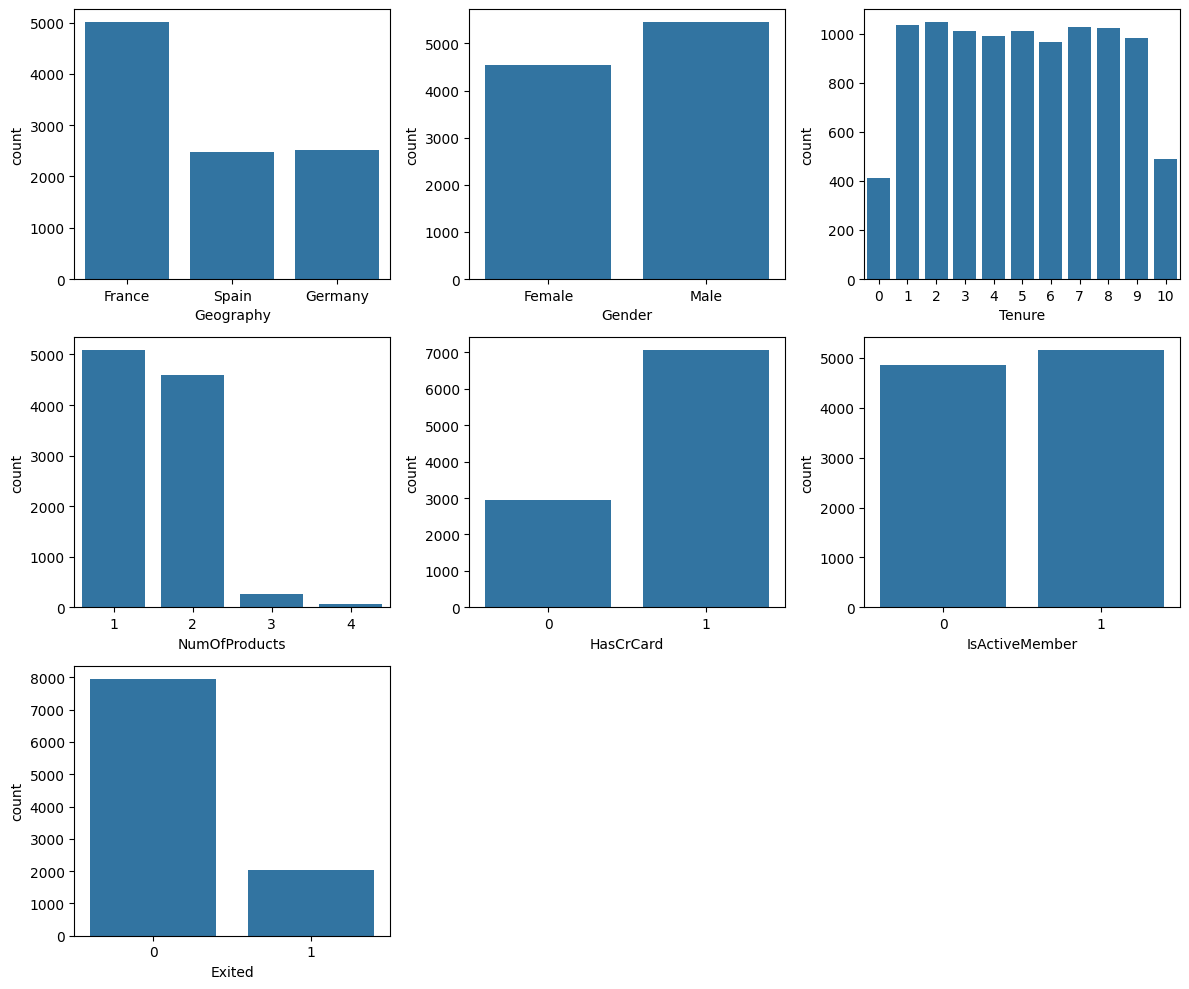

In [18]:
# Plot count plots for categorical features
categorical_features = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
plt.figure(figsize=(12, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, data=dataset)
plt.tight_layout()
plt.show()

<ipython-input-19-17f0a14a699f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")


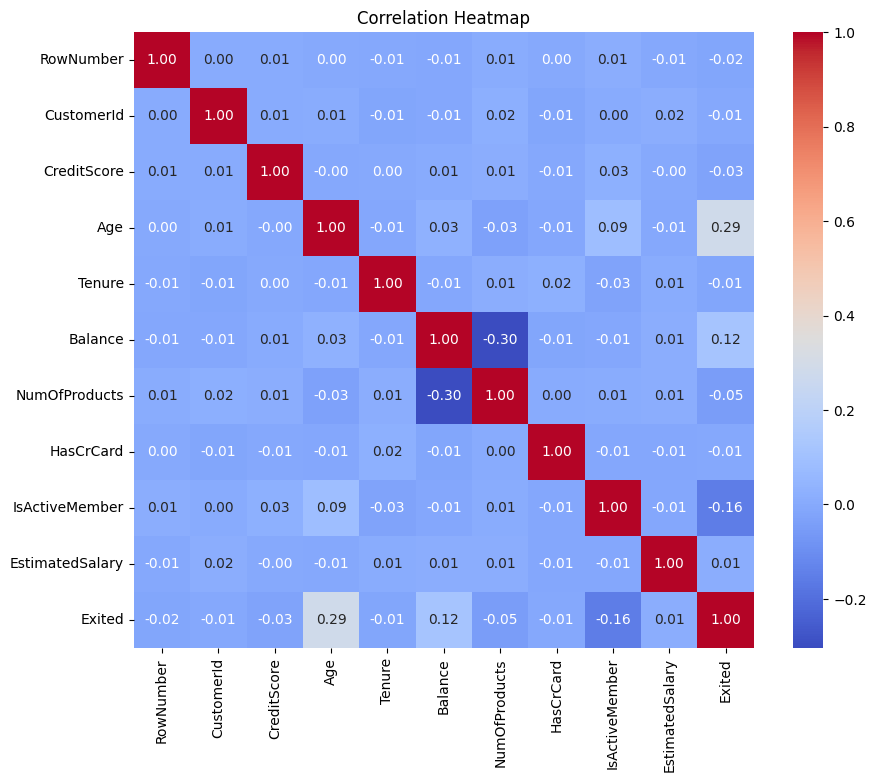

In [19]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#Preprocessing

In [38]:
dataset.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [39]:
dataset['Balance'] = dataset['Balance'].astype(int)
dataset['EstimatedSalary'] = dataset['EstimatedSalary'].astype(int)

#Encoding

In [41]:
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])
dataset['Geography'] = le.fit_transform(dataset['Geography'])

dataset.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0,1,1,1,101348,1
1,608,2,0,41,1,83807,1,0,1,112542,0
2,502,0,0,42,8,159660,3,1,0,113931,1
3,699,0,0,39,1,0,2,0,0,93826,0


#Splitting

In [42]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=['Exited']), dataset['Exited'], test_size=0.2, random_state=42)

#Logistic Regression

In [44]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred=LR.predict(X_test)
accuracyLR=accuracy_score(y_test,y_pred)

In [46]:
accuracyLR

0.8005

In [47]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.98      0.89      1607\n           1       0.45      0.07      0.12       393\n\n    accuracy                           0.80      2000\n   macro avg       0.63      0.53      0.51      2000\nweighted avg       0.74      0.80      0.74      2000\n'

#Random Forest Classifier

In [48]:
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
y_pred = RFC.predict(X_test)

In [50]:
accuracyRFC = accuracy_score(y_test, y_pred)

In [51]:
accuracyRFC

0.865

In [52]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.96      0.92      1607\n           1       0.75      0.47      0.58       393\n\n    accuracy                           0.86      2000\n   macro avg       0.82      0.72      0.75      2000\nweighted avg       0.86      0.86      0.85      2000\n'

#XGBoost

In [56]:
XGB = XGBClassifier(random_state=0)
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [57]:
y_pred= XGB.predict(X_test)

In [58]:
accuracyXGB=accuracy_score(y_test,y_pred)

In [59]:
accuracyXGB

0.8595

In [60]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.89      0.94      0.92      1607\n           1       0.69      0.51      0.59       393\n\n    accuracy                           0.86      2000\n   macro avg       0.79      0.73      0.75      2000\nweighted avg       0.85      0.86      0.85      2000\n'

#GradientBoosting

In [62]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)

In [63]:
accuracyGB=accuracy_score(y_test,y_pred)

In [64]:
accuracyGB

0.8655

In [65]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.96      0.92      1607\n           1       0.75      0.47      0.58       393\n\n    accuracy                           0.87      2000\n   macro avg       0.82      0.72      0.75      2000\nweighted avg       0.86      0.87      0.85      2000\n'

#Comparing algos

In [66]:
Algos=['GradientBoosting','XGBoost','RandomForest','LogisticRegression']
accuracy=[accuracyGB,accuracyXGB,accuracyRFC,accuracyLR]
finalRes=pd.DataFrame({'Algorithm':Algos,'Accuracy':accuracy})

In [67]:
finalRes

,Algorithm,Accuracy
0,GradientBoosting,0.8655
1,XGBoost,0.8595
2,RandomForest,0.8650
3,LogisticRegression,0.8005


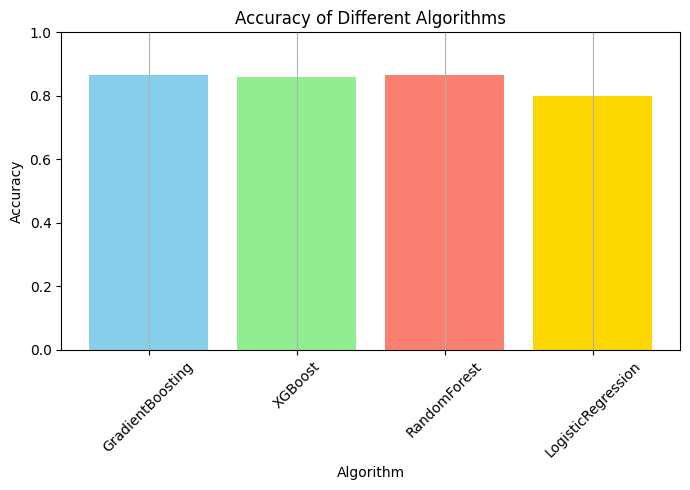

In [68]:
plt.figure(figsize=(7, 5))

# Define custom colors
colors = ['skyblue', 'lightgreen', 'salmon', 'gold']

# Plot the bar chart with custom colors
plt.bar(finalRes['Algorithm'], finalRes['Accuracy'], color=colors)

plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.tight_layout()
plt.show()